In [59]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [12]:
d = load_wine()

In [49]:
X = d['data']
y = d['target']
df = pd.DataFrame(data = d['data'], columns = d['feature_names'])
df['market'] = d['target']

In [58]:
df = df.sample(df.shape[0])
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [39]:
P = 50
i += P # passo dos dados
Xp = X[i:i+P,:]


In [34]:
df.iloc[i:i+P-1,:].shape

(11, 13)

In [45]:
np.var(Xp,axis=0)
np.corrcoef(Xp)

array([[1.        , 0.99995513, 0.99969163, ..., 0.99871353, 0.99869321,
        0.99954475],
       [0.99995513, 1.        , 0.99975542, ..., 0.99859891, 0.99857023,
        0.99962629],
       [0.99969163, 0.99975542, 1.        , ..., 0.99937461, 0.99936214,
        0.99996808],
       ...,
       [0.99871353, 0.99859891, 0.99937461, ..., 1.        , 0.9999972 ,
        0.99950589],
       [0.99869321, 0.99857023, 0.99936214, ..., 0.9999972 , 1.        ,
        0.99948599],
       [0.99954475, 0.99962629, 0.99996808, ..., 0.99950589, 0.99948599,
        1.        ]])

In [67]:
y

array([0, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 2,
       1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 0, 2, 1, 1,
       0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1, 0, 0, 1, 0, 1, 2, 0, 1,
       1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1,
       0, 0])

In [72]:
clf = DecisionTreeRegressor()
X_train,X_test,y_train,y_test = train_test_split(X,y)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
r2 = r2_score(y_test,y_predict)


In [75]:
y_test-y_predict

array([ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

In [78]:
r2_values = []

i = 0
N = 10 # tamanho da batelada
P = 6 # tamanho do passo
Xp = X[i:i+N,:]
yp = y[i:i+N]
np.var(Xp)
vars = np.var(Xp,axis=0)
#print(vars)
# treinamento
clf = DecisionTreeRegressor()
X_train,X_test,y_train,y_test = train_test_split(Xp,yp)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
r2 = r2_score(y_test,y_predict)
r2_values.append(r2)
while Xp.shape[0] == N:
  i += P # passo dos dados
  Xp = X[i:i+N,:]
  yp = y[i:i+N]
  vars = np.var(Xp,axis=0)
  #print(vars)
  # treinamento
  clf = DecisionTreeRegressor()
  X_train,X_test,y_train,y_test = train_test_split(Xp,yp)
  clf.fit(X_train,y_train)
  y_predict = clf.predict(X_test)
  r2 = r2_score(y_test,y_predict)
  r2_values.append(r2)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [85]:
r2_values = []
r2_values_batch = []

i = 0
N = 10 # tamanho da batelada
P = 10 # tamanho do passo
Xp = X[i:i+N,:]
yp = y[i:i+N]
np.var(Xp)
vars = np.var(Xp,axis=0)
#print(vars)
# treinamento
clf = DecisionTreeRegressor()
X_train,X_test,y_train,y_test = train_test_split(Xp,yp)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
r2 = r2_score(y_test,y_predict)
r2_values.append(r2)
r2_values_batch.append(r2)
while Xp.shape[0] == N:
  i += P # passo dos dados
  Xp = X[i:i+N,:]
  yp = y[i:i+N]
  vars = np.var(Xp,axis=0)

  y_predict = clf.predict(Xp)
  r2 = r2_score(yp,y_predict)
  r2_values_batch.append(r2)

  Xp = X[:i+N,:]
  yp = y[:i+N]
  # print(vars)
  # treinamento --
  clf = DecisionTreeRegressor()
  X_train,X_test,y_train,y_test = train_test_split(Xp,yp)
  clf.fit(X_train,y_train)
  y_predict = clf.predict(X_test)
  r2 = r2_score(y_test,y_predict)
  r2_values.append(r2)


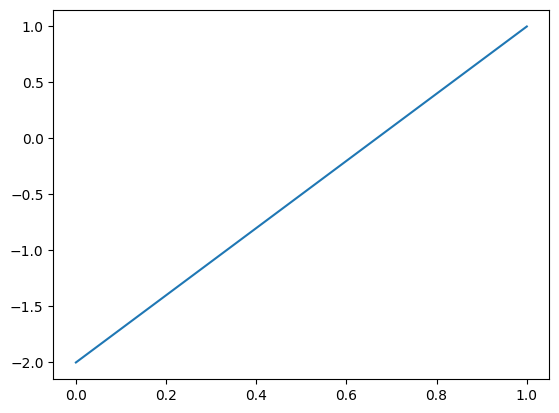

In [86]:
plt.plot(r2_values)

In [99]:
r2_values = []
r2_full_data = []

i = 0
N = 10 # tamanho da batelada
P = N # tamanho do passo
Xp = X[i:i+N,:]
yp = y[i:i+N]
np.var(Xp)
vars = np.var(Xp,axis=0)
#print(vars)
# treinamento
clf = DecisionTreeRegressor()
clf.fit(Xp,yp)
y_predict = clf.predict(Xp)
r2 = r2_score(yp,y_predict)
r2_values.append(r2)
r2_full_data.append(r2)
while i+N<=X.shape[0]:
  i += P # passo dos dados
  Xp = X[i:i+N,:]
  yp = y[i:i+N]
  vars = np.var(Xp,axis=0)

  y_predict = clf.predict(Xp)
  r2 = r2_score(yp,y_predict)
  r2_values.append(r2) # indicador para os dados novos sobre o model anterior

  # dados acumulados mais os da batelada atual
  Xp = X[:i+N,:]
  yp = y[:i+N]
  # print(vars)
  # treinamento --
  clf = DecisionTreeRegressor()
  clf.fit(Xp,yp)
  y_predict = clf.predict(Xp)
  r2 = r2_score(yp,y_predict)

  r2_full_data.append(r2)

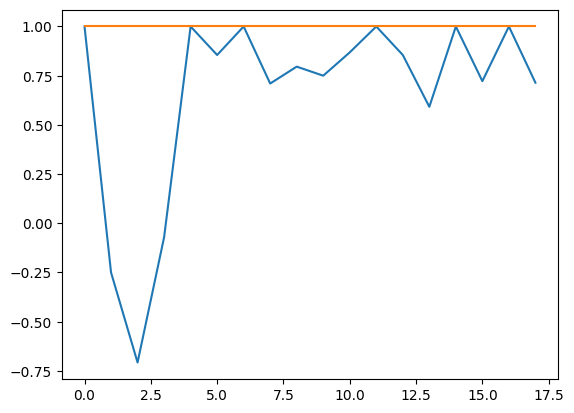

In [100]:
plt.plot(r2_values)
plt.plot(r2_full_data)